<a href="https://colab.research.google.com/github/lynilla/BangkitPlantPathology/blob/master/Baseline_CNN_Tomato_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tomato Diseases Classification

In [ ]:
import os
import zipfile
import tensorflow as tf

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

### Download Dataset From Kaggle

In [ ]:
os.environ['KAGGLE_USERNAME']="stellalindacyrilla"
os.environ['KAGGLE_KEY']="d13ab3b924cc9a7f29ab19d54085624b"
#486762582cfd4c5b5d4f6e7c16479f99

!kaggle datasets download noulam/tomato

tomato.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!rm -rf '/content/tomato' #remove existing tomato folder
local_zip = '/content/tomato.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/tomato')
zip_ref.close()

In [ ]:
#create directory for each training category
healthy_dir = os.path.join('/content/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy')
tomato_bs_dir = os.path.join('/content/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot')
tomato_eb_dir = os.path.join('/content/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight')
tomato_lb_dir = os.path.join('/content/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight')
tomato_lm_dir = os.path.join('/content/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold')
tomato_sls_dir = os.path.join('/content/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot')
tomato_tssm_dir = os.path.join('/content/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite')
tomato_ts_dir = os.path.join('/content/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot')
tomato_ylcv_dir = os.path.join('/content/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus')
tomato_mv_dir = os.path.join('/content/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus')

#show the number of images in each training category
print('total training Healthy:', len(os.listdir(healthy_dir)))
print('total training Bacterial Spot images:', len(os.listdir(tomato_bs_dir)))
print('total training Early Blight images:', len(os.listdir(tomato_eb_dir)))
print('total training Late Blight images:', len(os.listdir(tomato_lb_dir)))
print('total training Leaf Mold images:', len(os.listdir(tomato_lm_dir)))
print('total training Septoria Leaf Spot images:', len(os.listdir(tomato_sls_dir)))
print('total training Two-spotted Spider Mite images:', len(os.listdir(tomato_tssm_dir)))
print('total training Target Spot images:', len(os.listdir(tomato_ts_dir)))
print('total training Tomato Yellow Leaf Curl Virus images:', len(os.listdir(tomato_ylcv_dir)))
print('total training Tomato Mosaic Virus images:', len(os.listdir(tomato_mv_dir)))

healthy_files=os.listdir(healthy_dir)
tomato_bs_files=os.listdir(tomato_bs_dir)
tomato_eb_files=os.listdir(tomato_eb_dir)
tomato_lb_files=os.listdir(tomato_lb_dir)
tomato_lm_files=os.listdir(tomato_lm_dir)
tomato_sls_files=os.listdir(tomato_sls_dir)
tomato_tssm_files=os.listdir(tomato_tssm_dir)
tomato_ts_files=os.listdir(tomato_ts_dir)
tomato_ylcv_files=os.listdir(tomato_ylcv_dir)
tomato_mv_files=os.listdir(tomato_mv_dir)

tomato_train_dir=os.path.join('/content/tomato/New Plant Diseases Dataset(Augmented)/train')
tomato_valid_dir=os.path.join('/content/tomato/New Plant Diseases Dataset(Augmented)/valid')

#check the size of training and validation dataset
num_train_img= sum([len(files) for r, d, files in os.walk("/content/tomato/New Plant Diseases Dataset(Augmented)/train")])
num_valid_img= sum([len(files) for r, d, files in os.walk("/content/tomato/New Plant Diseases Dataset(Augmented)/valid")])

print('\nTotal training images: ',num_train_img)
print('Total validation images: ',num_valid_img)

total training Healthy: 1926
total training Bacterial Spot images: 1702
total training Early Blight images: 1920
total training Late Blight images: 1851
total training Leaf Mold images: 1882
total training Septoria Leaf Spot images: 1745
total training Two-spotted Spider Mite images: 1741
total training Target Spot images: 1827
total training Tomato Yellow Leaf Curl Virus images: 1961
total training Tomato Mosaic Virus images: 1790

Total training images:  18345
Total validation images:  4585


### Displaying Some Image Examples

In [ ]:
%matplotlib inline

rows=10
cols=3
pic_index=3

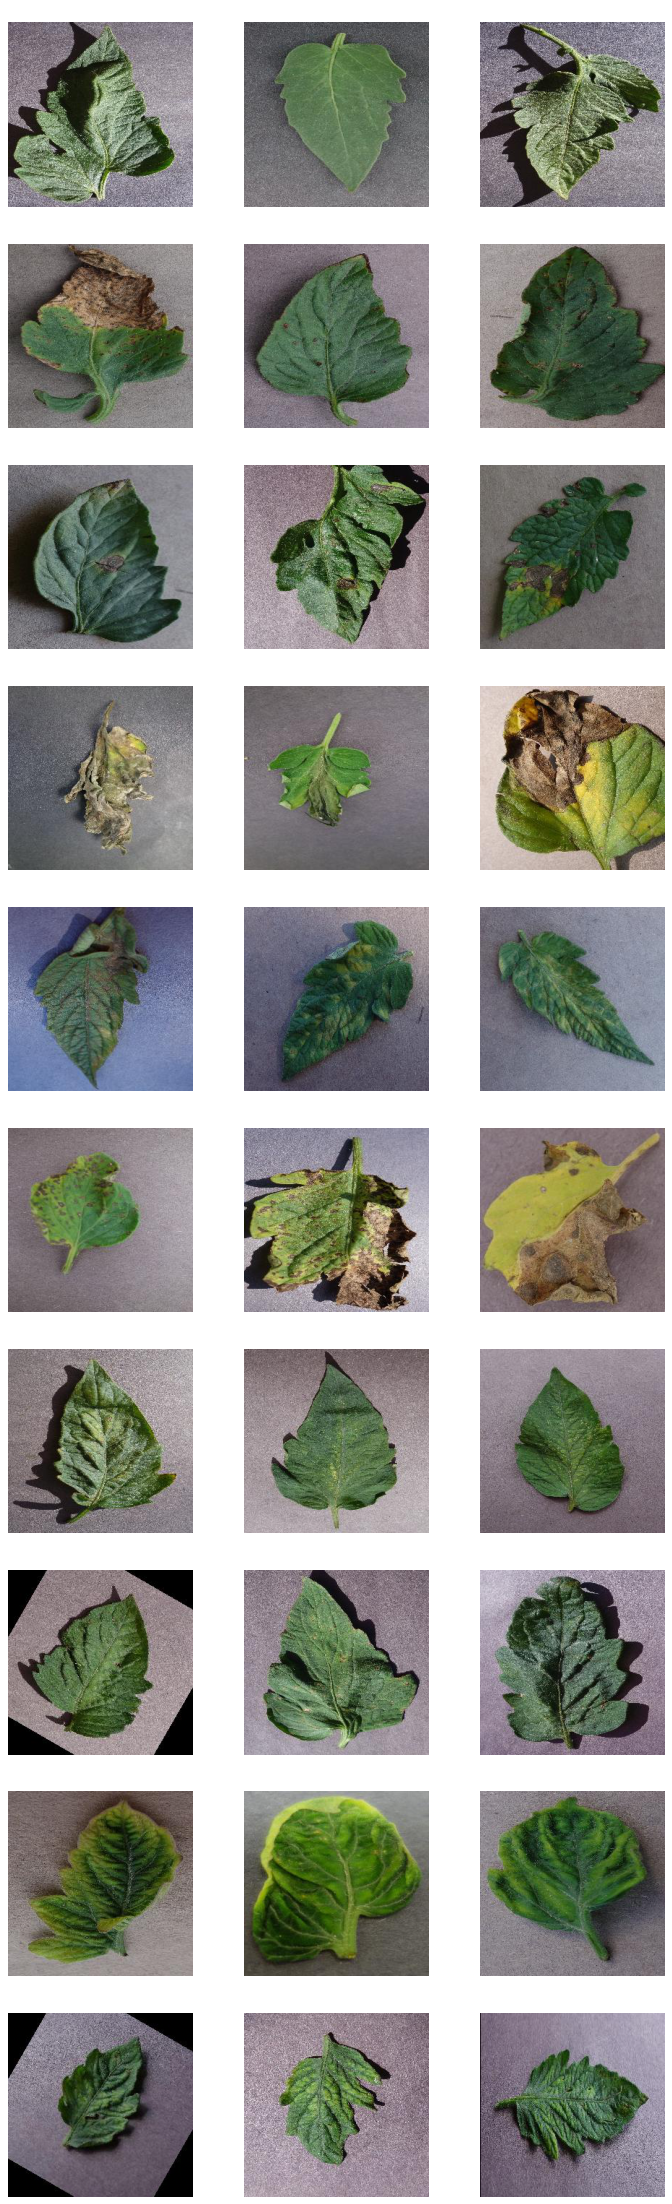

In [ ]:
fig = plt.gcf()
fig.set_size_inches(cols*4, rows*4)

title_list=[]
healthy_pic, tomato_bs_pic, tomato_eb_pic, tomato_lb_pic, tomato_lm_pic, tomato_sls_pic, tomato_tssm_pic, = [], [], [], [], [], [], []
tomato_ts_pic, tomato_ylcv_pic, tomato_mv_pic= [], [], []


for ex in healthy_files[ pic_index-3:pic_index]:
  healthy_pic.append(os.path.join(healthy_dir, ex))
  title_list.append(healthy_dir.split('___')[-1])

for ex in tomato_bs_files[ pic_index-3:pic_index]:
  tomato_bs_pic.append(os.path.join(tomato_bs_dir, ex))
  title_list.append(tomato_bs_dir.split('___')[-1])

for ex in tomato_eb_files[ pic_index-3:pic_index]:
  tomato_eb_pic.append(os.path.join(tomato_eb_dir, ex))
  title_list.append(tomato_eb_dir.split('___')[-1])

for ex in tomato_lb_files[ pic_index-3:pic_index]:
  tomato_lb_pic.append(os.path.join(tomato_lb_dir, ex))
  title_list.append(tomato_lb_dir.split('___')[-1])

for ex in tomato_lm_files[ pic_index-3:pic_index]:
  tomato_lm_pic.append(os.path.join(tomato_lm_dir, ex))
  title_list.append(tomato_lm_dir.split('___')[-1])

for ex in tomato_sls_files[ pic_index-3:pic_index]:
  tomato_sls_pic.append(os.path.join(tomato_sls_dir, ex))
  title_list.append(tomato_sls_dir.split('___')[-1])

for ex in tomato_tssm_files[ pic_index-3:pic_index]:
  tomato_tssm_pic.append(os.path.join(tomato_tssm_dir, ex))
  title_list.append(tomato_tssm_dir.split('mites ')[-1])

for ex in tomato_ts_files[ pic_index-3:pic_index]:
  tomato_ts_pic.append(os.path.join(tomato_ts_dir, ex))
  title_list.append(tomato_ts_dir.split('___')[-1])

for ex in tomato_ylcv_files[ pic_index-3:pic_index]:
  tomato_ylcv_pic.append(os.path.join(tomato_ylcv_dir, ex))
  title_list.append(tomato_ylcv_dir.split('___')[-1])

for ex in tomato_mv_files[ pic_index-3:pic_index]:
  tomato_mv_pic.append(os.path.join(tomato_mv_dir, ex))
  title_list.append(tomato_mv_dir.split('___')[-1])

for i, img_path in enumerate(healthy_pic+tomato_bs_pic+tomato_eb_pic+tomato_lb_pic+tomato_lm_pic+tomato_sls_pic+tomato_tssm_pic+tomato_ts_pic+tomato_ylcv_pic+tomato_mv_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(10, cols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  img_title=plt.title(title_list[i])
  plt.setp(img_title, color='w')  
plt.show()

### Data Augmentation & Create The Model

In [ ]:
train_dir="/content/tomato/New Plant Diseases Dataset(Augmented)/train"
train_datagen= ImageDataGenerator(
      #rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

valid_dir="/content/tomato/New Plant Diseases Dataset(Augmented)/valid"
valid_datagen=ImageDataGenerator()

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=320
)

valid_generator=valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=320
)

model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D((64),(3,3), activation='relu', input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D((64),(3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D((128),(3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D((256),(3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')             
])

model.summary()

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________

In [ ]:
#create callback to stop training when reach expected accuracy
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.8):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks= myCallback()

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history=model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=25,
    #steps_per_epoch=100,
    #validation_steps=50,
    #callbacks=[callbacks],
    verbose=1
)

Epoch 1/25
58/58 [==============================] - 123s 2s/step - loss: 34.0903 - accuracy: 0.1484 - val_loss: 2.2530 - val_accuracy: 0.1520
Epoch 2/25
58/58 [==============================] - 121s 2s/step - loss: 2.6525 - accuracy: 0.1634 - val_loss: 2.2264 - val_accuracy: 0.1459
Epoch 3/25
58/58 [==============================] - 123s 2s/step - loss: 2.5320 - accuracy: 0.1670 - val_loss: 2.1078 - val_accuracy: 0.2294
Epoch 4/25
58/58 [==============================] - 124s 2s/step - loss: 2.3205 - accuracy: 0.1977 - val_loss: 2.2205 - val_accuracy: 0.1636
Epoch 5/25
58/58 [==============================] - 123s 2s/step - loss: 2.1507 - accuracy: 0.2473 - val_loss: 3.3334 - val_accuracy: 0.1612
Epoch 6/25
58/58 [==============================] - 123s 2s/step - loss: 2.0065 - accuracy: 0.2948 - val_loss: 1.9451 - val_accuracy: 0.3276
Epoch 7/25
58/58 [==============================] - 122s 2s/step - loss: 2.9620 - accuracy: 0.3173 - val_loss: 2.9746 - val_accuracy: 0.1935
Epoch 8/25
5

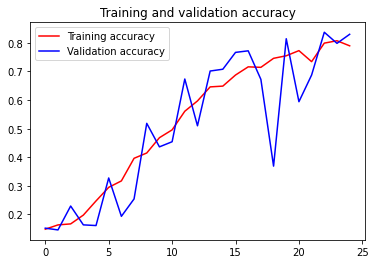

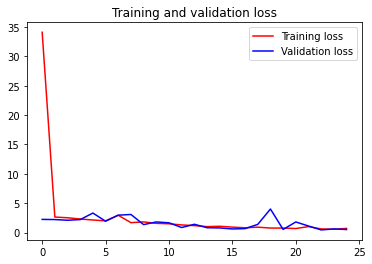

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
#clean up
import signal

os.kill(     os.getpid() , 
         signal.SIGKILL
       )